# Matplotlib Homework - The Power of Plots

## Background

What good is data without a good plot to tell the story?

So, let's take what you've learned about Python Matplotlib and apply it to a real-world situation and dataset:

![Laboratory](Images/Laboratory.jpg)

While your data companions rushed off to jobs in finance and government, you remained adamant that science was the way for you. Staying true to your mission, you've joined Pymaceuticals Inc., a burgeoning pharmaceutical company based out of San Diego. Pymaceuticals specializes in anti-cancer pharmaceuticals. In its most recent efforts, it began screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

As a senior data analyst at the company, you've been given access to the complete data from their most recent animal study. In this study, 250 mice identified with SCC tumor growth were treated through a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens. You have been tasked by the executive team to generate all of the tables and figures needed for the technical report of the study. The executive team also has asked for a top-level summary of the study results.

## Instructions

Your tasks are to do the following:

* Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.

* Generate a bar plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows the number of data points for each treatment regimen.

  * **NOTE:** These plots should look identical.

* Generate a pie plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows the distribution of female or male mice in the study.

  * **NOTE:** These plots should look identical.

* Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

* Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.

  **Hint**: All four box plots should be within the same figure. Use this [Matplotlib documentation page](https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py) for help with changing the style of the outliers.

* Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin.

* Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.

* Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.

* Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.

Here are some final considerations:

* You must use proper labeling of your plots, to include properties such as: plot titles, axis labels, legend labels, _x_-axis and _y_-axis limits, etc.

* See the [starter workbook](Pymaceuticals/pymaceuticals_starter.ipynb) for help on what modules to import and expected format of the notebook.

## Hints and Considerations

* Be warned: These are very challenging tasks. Be patient with yourself as you trudge through these problems. They will take time and there is no shame in fumbling along the way. Data visualization is equal parts exploration, equal parts resolution.

* You have been provided a starter notebook. Use the code comments as a reminder of steps to follow as you complete the assignment.

* Don't get bogged down in small details. Always focus on the big picture. If you can't figure out how to get a label to show up correctly, come back to it. Focus on getting the core skeleton of your notebook complete. You can always revisit old problems.

* While you are trying to complete this assignment, feel encouraged to constantly refer to Stack Overflow and the Pandas documentation. These are needed tools in every data analyst's tool belt.

* Remember, there are many ways to approach a data problem. The key is to break up your task into micro tasks. Try answering questions like:

  * How does my DataFrame need to be structured for me to have the right _x_-axis and _y_-axis?

  * How do I build a basic scatter plot?

  * How do I add a label to that scatter plot?

  * Where would the labels for that scatter plot come from?

  Again, don't let the magnitude of a programming task scare you off. Ultimately, every programming problem boils down to a handful of bite-sized tasks.

* Get help when you need it! There is never any shame in asking. But, as always, ask a _specific_ question. You'll never get a great answer to "I'm lost."

### Copyright

Trilogy Education Services © 2019. All Rights Reserved.


## Observations and Insights

## Dependencies and starter code

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

# mouse_metadata.head()
# study_results.head()

df = pd.merge(mouse_metadata, study_results, how='inner', on = 'Mouse ID')
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# TODO: do a groupby, then do summary stats as in matplotlib day 3 exercise 1; SEM as in day 3 exercise 4

grouped_df = df.groupby(["Drug Regimen"])
grouped_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [4]:
mean_vol = grouped_df["Tumor Volume (mm3)"].mean()
median_vol = grouped_df["Tumor Volume (mm3)"].median()
variance_vol = grouped_df["Tumor Volume (mm3)"].var()
stdev_vol = grouped_df["Tumor Volume (mm3)"].apply(lambda x: np.std(x, ddof = 0))
sem_vol = grouped_df["Tumor Volume (mm3)"].apply(lambda x: st.sem(x))

summary_stat_df = pd.DataFrame({
    "Mean Tumor Volume": mean_vol,
    "Median Tumor Volume": median_vol,
    "Variance of Tumor Volume": variance_vol,
    "Standard Deviation of Tumor Volume": stdev_vol,
    "SEM Value of Tumor Volume": sem_vol
})

summary_stat_df

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM Value of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.983904,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.250556,0.469821
Infubinol,52.884795,51.820584,43.128684,6.548770,0.492236
Ketapril,55.235638,53.698743,68.553577,8.257659,0.603860
Naftisol,54.331565,52.509285,66.173479,8.112811,0.596466
Placebo,54.033581,52.288934,61.168083,7.799368,0.581331
Propriva,52.322552,50.854632,42.351070,6.487528,0.512884
Ramicane,40.216745,40.673236,23.486704,4.835669,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.689090,0.573111


## Bar plots

In [22]:
counts = grouped_df["Mouse ID"].count()
# counts
counts.tolist()

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

In [25]:
counts.axes

[Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
        'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
       dtype='object', name='Drug Regimen')]

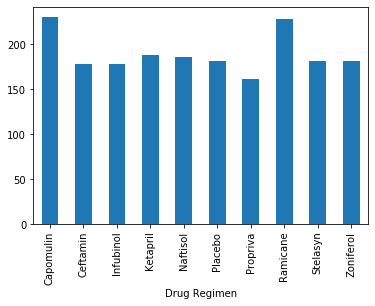

In [11]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# SEE matplotlib day 2 activity 2

# counts.plot.bar(x="name", y="rating")
counts.plot.bar()

# TODO - add labels, format, etc

In [18]:
grouped_df.count()["Mouse ID"]

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

<BarContainer object of 10 artists>

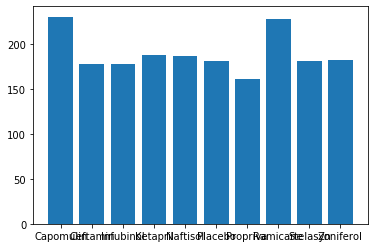

In [27]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# SEE matplotlib day 2 activity 1

# plt.bar(grouped_df["Mouse ID"], grouped_df.count()["Mouse ID"])

plt.bar(counts.axes[0], counts.tolist())

# TODO - Format, etc, make these two barcharts look identical

## Pie plots

In [31]:
gender_group = df.groupby(["Sex"])
gender_group.count()

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,935,935,935,935,935,935,935
Male,958,958,958,958,958,958,958


In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



([<matplotlib.patches.Wedge at 0x7fd2d218e7c0>,
 [Text(0.02099250347258556, 1.0997996703027118, ''),
  Text(-0.020992503472586185, -1.0997996703027118, '')])

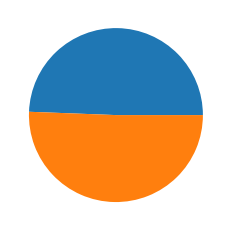

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# SEE matplotlib day 1 activity 9

plt.pie(gender_group.count()["Mouse ID"].tolist())

# TODO - labels, prettify, etc

## Quartiles, outliers and boxplots

In [14]:
# df_values = df.values
# df_values[0]

# Getting the data:

df_values = df.values
df_values[0][1]

treatments = ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"]
final_weights = {}

for treatment in treatments:
    final_weights[treatment] = []
    for x in range(0, len(df_values)):
        if df_values[x][1] == treatment and df_values[x][5] == 20:
            final_weights[treatment].append(df_values[x][6])
        
final_weights

{'Capomulin': [36.86687576,
  36.06583471,
  34.255731700000005,
  30.48598484,
  40.34394812,
  40.71642815,
  36.01558858,
  38.90934919,
  39.0702138,
  38.53113634,
  41.10809233,
  42.95712001,
  44.81309343,
  37.95035546,
  42.731552,
  44.02037009,
  48.15820939,
  39.64829568,
  45.93332219,
  42.62996266,
  48.07045162,
  43.22567119,
  43.96789516],
 'Ceftamin': [50.51343652,
  53.42766344,
  54.44303502,
  54.00534209,
  51.99761855,
  52.22832698,
  51.90544699,
  52.61749003,
  53.24431157,
  50.85614078,
  52.90529861,
  50.239855799999994,
  50.37805789,
  49.55426295,
  51.20796943,
  51.91490968,
  55.02572434,
  52.36198241],
 'Infubinol': [55.17333648,
  54.46259376,
  52.36518457,
  49.49055902,
  56.74200681,
  53.67683960000001,
  55.24927296,
  49.61338303,
  55.08772445,
  54.77896052,
  54.48451945,
  54.82252091,
  50.33655288,
  51.90902494,
  52.0050659,
  54.04860769,
  50.00513807,
  53.32350743,
  54.57107607,
  51.80794416],
 'Ramicane': [32.99772858,
 

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


treatments = ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"]
final_weights = {}

for treatment in treatments:
    final_weights[treatment] = []
    for x in range(0, len(df_values)):
        if df_values[x][1] == treatment and df_values[x][5] == 20:
            final_weights[treatment].append(df_values[x][6])


# SEE matplotlib day 3 exercise 2

# TODO - replace temperature information below with final temperature data for each of the four treatments

quartiles = temperatures.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# SEE matplotlib day 3 exercise 2

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# see day 2 exercise 7, 10
# average? a particular mouse?

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# matplotlib day 1 exercise 11-12

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# SEE matplotlib day 3 exercise 8

In [ ]:
# day 2 exercise 1 has general overview of matplotlib plots